## Calculating the Return of a Portfolio of Securities

Load the data for a portfolio composed of 5 stocks - British Petroleum, Ford, Exxon, Lincoln, and Apple *(5_stocks_2000_2017.csv)*.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

five_stocks = pd.read_csv("C:\GitHub\python-finance\python-finance\PART II - Finance\\11 - Rates of Return\\4 Calculating the Return of a Portfolio of Securities\CSV\\5_stocks_2000_2017.csv", index_col="Date")
five_stocks.info()
five_stocks.tail()
five_stocks.head()

<class 'pandas.core.frame.DataFrame'>
Index: 4517 entries, 1999-12-31 to 2017-12-12
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BP      4517 non-null   float64
 1   F       4517 non-null   float64
 2   XOM     4517 non-null   float64
 3   LNC     4517 non-null   float64
 4   AAPL    4517 non-null   float64
dtypes: float64(5)
memory usage: 211.7+ KB


,BP,F,XOM,LNC,AAPL
Date,,,,,
1999-12-31,26.942526,17.911160,25.595554,27.138775,3.291592
2000-01-03,26.715410,17.596191,24.880707,26.502689,3.583733
2000-01-04,26.573452,17.008251,24.404148,25.739405,3.281587
2000-01-05,27.481936,17.071245,25.734549,24.848928,3.329610
2000-01-06,27.538712,17.092241,27.064951,25.303717,3.041471


### Normalization to 100:

$$
\frac {P_t}{P_0} * 100
$$

Normalize to a hundred and plot the data on a graph (you can apply the .loc() or the .iloc() method). 

In [5]:
five_stocks.iloc[0]

BP      26.942526
F       17.911160
XOM     25.595554
LNC     27.138775
AAPL     3.291592
Name: 1999-12-31, dtype: float64

<AxesSubplot:xlabel='Date'>

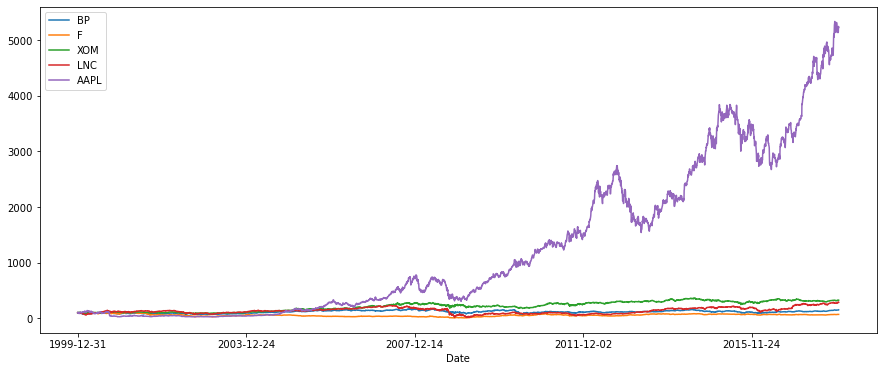

In [8]:
(five_stocks/five_stocks.iloc[0] * 100).plot(figsize=(15,6))

In [9]:
five_stocks.loc['2000-05-01']

BP      23.452255
F       18.514761
XOM     24.920315
LNC     24.105839
AAPL     3.979924
Name: 2000-05-01, dtype: float64

How would you interpret the behavior of the stocks? Just by looking at the chart, would you be able to create a portfolio that provides a solid return on investment?

*****

### Calculating the Return of a Portfolio of Securities

Obtain the simple return of the securities in the portfolio and store the results in a new table.

In [10]:
returns = (five_stocks/five_stocks.shift(1)) - 1
returns.head()

,BP,F,XOM,LNC,AAPL
Date,,,,,
1999-12-31,NaN,NaN,NaN,NaN,NaN
2000-01-03,-0.008430,-0.017585,-0.027929,-0.023438,0.088754
2000-01-04,-0.005314,-0.033413,-0.019154,-0.028800,-0.084310
2000-01-05,0.034188,0.003704,0.054515,-0.034596,0.014634
2000-01-06,0.002066,0.001230,0.051697,0.018302,-0.086538


First, assume you would like to create an equally-weighted portfolio. Create the array, naming it “weights”.

In [11]:
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

Obtain the annual returns of each of the stocks and then calculate the dot product of these returns and the weights.

In [12]:
np.dot(returns, weights)

array([        nan,  0.00227443, -0.03419821, ...,  0.00573022,
        0.0022907 ,  0.00400778])

In [13]:
annual_returns = returns.mean() * 250
annual_returns

BP      0.062602
F       0.070093
XOM     0.094579
LNC     0.198599
AAPL    0.309165
dtype: float64

In [14]:
np.dot(annual_returns, weights)

0.14700757535575648

Transform the result into a percentage form. 

In [18]:
print(round(np.dot(annual_returns, weights)*100,3),'%')

14.701 %


Is the return of this portfolio satisfactory?